# Import the used libraries 

In [12]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np

# Read the image

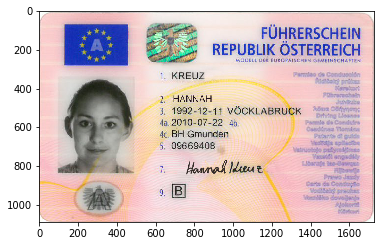

In [13]:
img = cv2.imread('at_dl_001.jpg')  #pass 0 to convert into gray level 
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

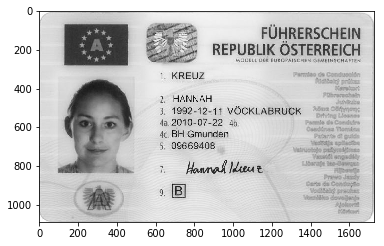

In [14]:
gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap='gray')

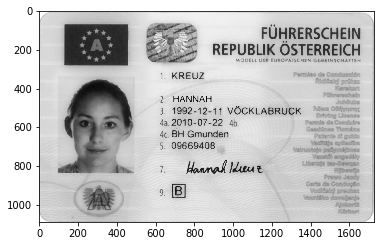

In [15]:
median = cv2.medianBlur(gray,5)
plt.imshow(median,cmap='gray')

# Image segmentation : We want to separate the object from the image by find the boundary of that object 

# Apply HaarCascade to detect the face and Cropping 

**HaarCascade:it is a face detector working with an algorithm called Haar cascades this algorithm works by training on many positive images (images of faces) and negative images (images without faces) .Haar features are gradient measurements that look at rectangular regions around,Haar features detect patterns like edges,lines, and more complex rectangular patterns.a Haar feature detector like this vertical line detector,and then performs classification on the entire image,it's a series of cascades.
If it doesn't get enough of a feature detection response,it classifies an area of an image as "not face nd discards this information then feeds this reduced image area to the next feature detector and classifies the image again discarding irrelevant non-face areas at every step.This is called a "cascade of classifiers ** 

**Referance [ HaarCascade to detect the face](https://www.researchgate.net/publication/318900718_Face_Detection_Face_Recognition_Using_Open_Computer_Vision_Classifies)**


In [16]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') # We load the cascade for the face.

In [17]:

def detect(gray, frame): # We create a function that takes as input the image in black and white (gray) and the original image (frame), and that will return the same image with the detector rectangles. 
    faces = face_cascade.detectMultiScale( gray,scaleFactor=1.1,minNeighbors=5,minSize=(100, 100)) # We apply the detectMultiScale method from the face cascade to locate one or several faces in the image.
    for (x, y, w, h) in faces: # For each detected face:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 0), 0) # We paint a rectangle around the face without any border.
        roi_gray = gray[y:y+h, x:x+w] # We get the region of interest in the black and white image.
        roi_color = frame[y:y+h, x:x+w] # We get the region of interest in the colored image.
        print(x, y, w, h)
    return roi_color # We return the detector rectangles area.

 

In [18]:
canvas=detect(gray, img) # We get the output shap our detect function.


132 451 353 353


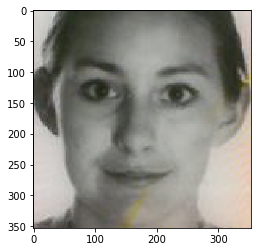

In [19]:
plt.imshow(canvas)


# Face Segmentation by using graphCut based on Haar Cascade Dimension

**GraphCut :kind of Interactive Image segmentation(the user can give informtion to make right sigmentation) we use the gradient between the neighbor points and use this value in segmentaion process (to detect the similar pixels to stay together and different pixels to become a part of forground or background)**

**Referance [Digital image processing:GraphCuts](https://www.youtube.com/watch?v=HMGX8HXskKk&list=PLZ9qNFMHZ-A79y1StvUUqgyL-O0fZh2rs&index=44)**

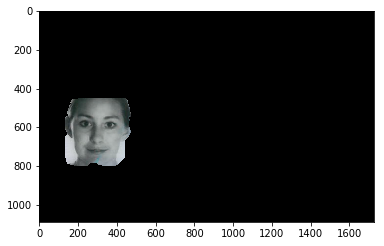

In [20]:
img2 = cv2.imread('at_dl_001.jpg')
mask = np.zeros(img2.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (132, 451,353, 353)
cv2.grabCut(img2,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img3 = img2*mask2[:,:,np.newaxis]
plt.imshow(img3)

# Face Segmentation by using Active Contours


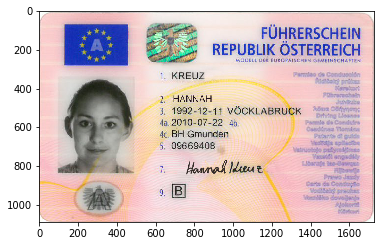

In [21]:
img4 = cv2.imread('at_dl_001.jpg') 
img4=cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
plt.imshow(img4)

In [22]:
gray2=cv2.cvtColor(img4,cv2.COLOR_BGRA2GRAY)

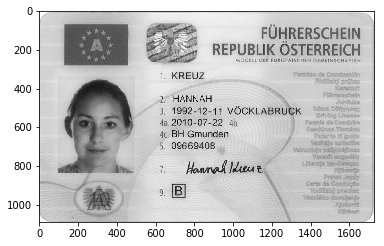

In [23]:
plt.imshow(gray2,cmap='gray')

In [24]:
ret,thr = cv2.threshold(gray2, 100, 255, cv2.THRESH_OTSU)

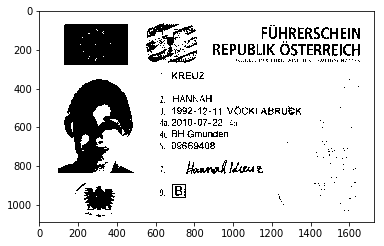

In [25]:
plt.imshow(thr,cmap='gray')

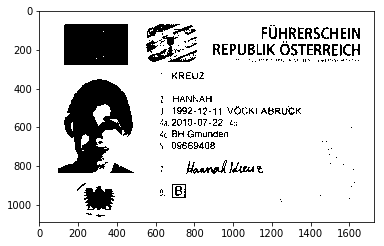

In [26]:
median1 = cv2.medianBlur(thr,5)
plt.imshow(median1,cmap='gray')


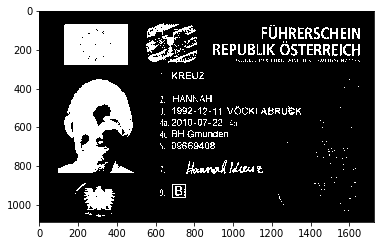

In [27]:
# inverse Image 
imagem = cv2.bitwise_not(thr)
plt.imshow(imagem,cmap='gray')

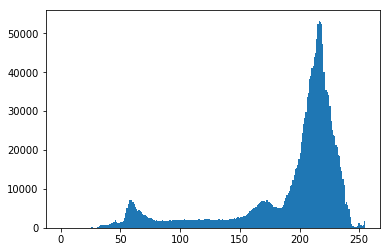

In [28]:
plt.hist(median.ravel(), 255, [0, 255])
plt.show()

**Apply Histogram equalization:This method usually increases the global contrast of many images, especially when the usable data of the image is represented by close contrast values. Through this adjustment, the intensities can be better distributed on the histogram. This allows for areas of lower local contrast to gain a higher contrast. Histogram equalization accomplishes this by effectively spreading out the most frequent intensity values. <br> Histogram Equalization (HE) is the process of remaps the pixels of the image.**

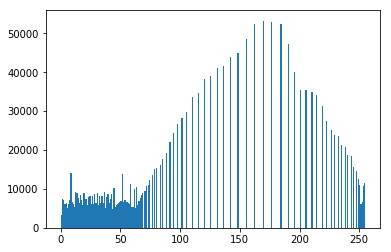

In [29]:
equ = cv2.equalizeHist(median) 
plt.hist(equ.ravel(), 255, [0, 255])
plt.show()

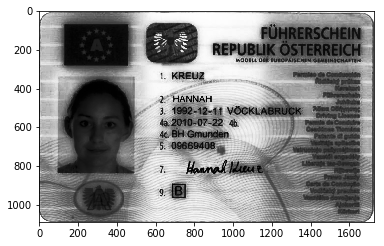

In [30]:
plt.imshow(equ,cmap='gray')

In [31]:
 ret, contours, hierarchy = cv2.findContours(imagem, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [32]:
len(contours)

559

In [33]:
for cnt in contours:
    area=cv2.minAreaRect(cnt) #contour area
    box=cv2.boxPoints(area)
    box=np.int0(box)
    cv2.drawContours(img4,[box],0,(255,0,0),5)


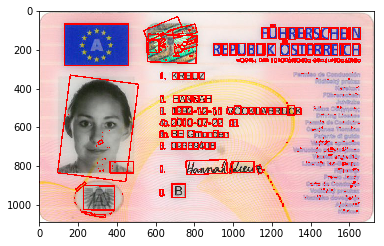

In [34]:
plt.imshow(img4)                  

# Apply HoughTransform to detect curves areas

**We use Hough Transform to segment the object dealing with the straight Line or Curves  and the Referance How HoughTransform working is here: <br>[Explain Hough Transformation](https://stackoverflow.com/questions/4709725/explain-hough-transformation) 
        <br> [Hough Transform with Matlab Demo](https://www.coursera.org/learn/image-processing/lecture/A4RiJ/3-hough-transform-with-matlab-demo-duration-20-59)**

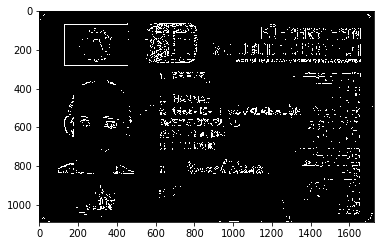

In [35]:
lower=70
upper=120
edges=cv2.Canny(gray2,lower,upper)
plt.imshow(edges,cmap='gray') 

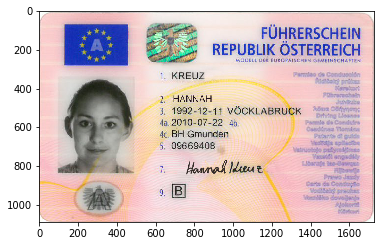

In [36]:

img5 = cv2.imread('at_dl_001.jpg')  #pass 0 to convert into gray level 
img5=cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)
plt.imshow(img5)

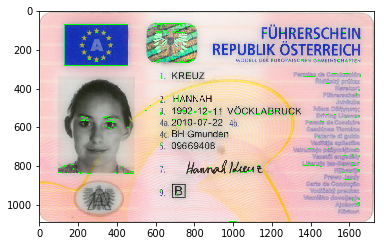

In [37]:
roh=1
theta=np.pi/180
threshold=80
minLineLength=20
maxLineGap=7

lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
line_image=np.array(img5)
for line in lines:
     for x1,y1,x2,y2 in line:
        #cv2.line(line_image,(x1,y1),(x2,y2),(0,255,0),5)
        pts = np.array([[x1, y1 ], [x2 , y2]], np.int32)
        cv2.polylines(line_image, [pts], True, (0,255,0))


plt.imshow(line_image)

# For the detection of the text  what is the OCR?



** OCR: "optical character recognition" it is one such system that allow us to scan printed ,type written or hand written text and convert scanned image into computer process format the coverted documents can be edited or become editable Also we need some Algorithms to remove pics,tables,etc before pass the the document into OCR engine **

# The Main Issues affect on OCR Quality:-
** The challenging due to variations in:-**


- **The font type(it is standard type or not standard type),text size, font color.**
- **Ink Strike :-refer to the amount of ink is placed on the paper.**
- **Document fragility.**
- **Scene complexity, uneven lighting, blurring, aspect ratio and distortion.**

# The Guide line:the Preprocessing Steps


** let's suppose we have a color scanned document as in our situation so we will do the following stepsto smooth out the image and make it a binary image (black or white)**

**1. Apply gray scale transform**<br>
**2. We then use adaptive thresholding to binarize the image (make it black or white) and we then invert the colours since OpenCV uses black as the background and white as the objects the more common method is OTSU method**<br>
**3. noise elimination to delet isolated pixels and to improve the further steps(median filter technique seems to be the best way)**<br>
**4. do a feature extraction/detection with edge detection technique to identify the characters(group of connected pixele ) we can use KNN as  a classifier for example**


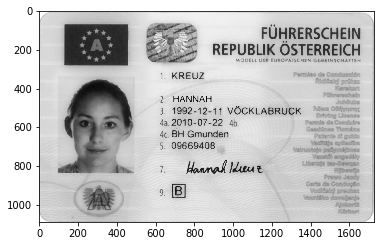

In [38]:
img7 = cv2.imread('at_dl_001.jpg')  #pass 0 to convert into gray level 
img7=cv2.cvtColor(img7, cv2.COLOR_BGR2RGB)
gray7=cv2.cvtColor(img7,cv2.COLOR_RGB2GRAY)
median6 = cv2.medianBlur(gray7,5)
plt.imshow(median6,cmap='gray')

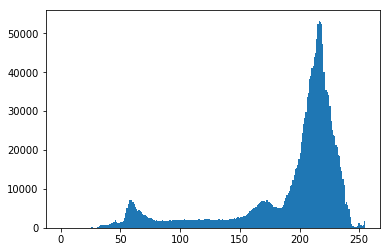

In [39]:
plt.hist(median6.ravel(), 255, [0, 255])
plt.show()

**Apply OTSU method we can also use Adaptive Thresholding to get better result**


**OTSU image sgmentation Algorithm :it look at the pixels value and histogram distrbuted to find the thershold to separate the classes (Maximize variance between 2 classes or minimize the variance within the class),OTSU Method does not good for dealing with a non uniform background and the solution for non uniform background we can apply OTSU in blocks of the image and then going to get different thershold for every single of those blocks and then take the average of the thershold for all those block or using moving window and also the average thershold <br> Referance: [Otsu's Segmentation with Demo](https://www.coursera.org/learn/image-processing/lecture/72Ktu/5-otsus-segmentation-with-demo-duration-14-25) 
        <br> [Image Thresholding](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html)**
 



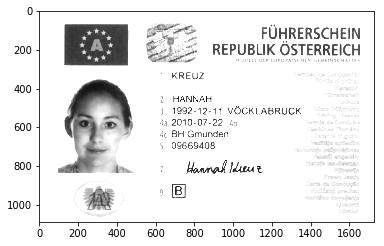

In [40]:
ret,thr1 = cv2.threshold(median6, 180, 240, cv2.THRESH_TRUNC,cv2.THRESH_OTSU)   #binarization
plt.imshow(thr1,cmap='gray')

**Apply Median Filter: we us median filter to deal with salt and pepper noise(black and white isolated pixels)**

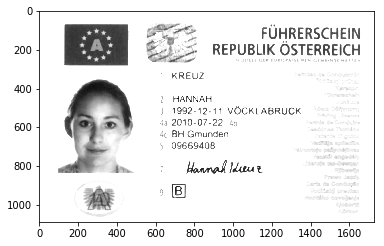

In [41]:
median7 = cv2.medianBlur(thr1,5)
plt.imshow(median7,cmap='gray')

** Flipping Image pixels**

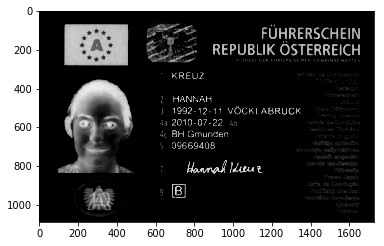

In [42]:
imagem = cv2.bitwise_not(median7)
plt.imshow(imagem,cmap='gray')

**Apply Median Filter again**

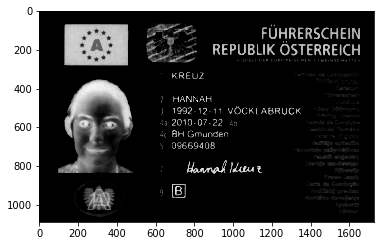

In [43]:
median8 = cv2.medianBlur(imagem,5)
plt.imshow(median8,cmap='gray')

**Apply Dilation and Erosion**

In [44]:
# Create a 5x5 kernel of ones
kernel = np.ones((5,5),np.uint8)

In [45]:
# Dilate the image
dilation = cv2.dilate(median8, kernel, iterations = 1) 

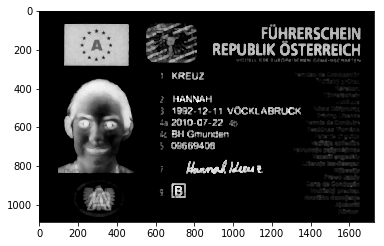

In [46]:
plt.imshow(dilation,cmap='gray')                                                 

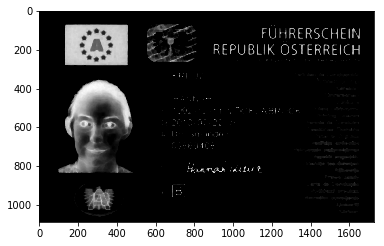

In [47]:
erosion = cv2.erode(median8, kernel, iterations = 1)
plt.imshow(erosion,cmap='gray')                                                      #not good idea

**Apply opening and closing**

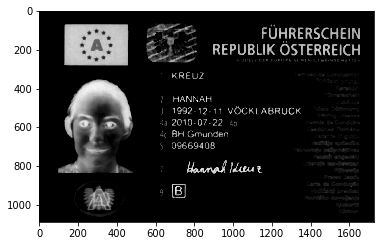

In [48]:
closing = cv2.morphologyEx(median8, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing,cmap='gray')

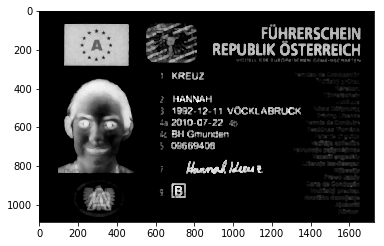

In [49]:
opening = cv2.morphologyEx(dilation, cv2.MORPH_OPEN, kernel)
plt.imshow(opening,cmap='gray')

***---->here we can apply Sliding Window and and feed the training  classifier to detect the characters on this image***

# The Methods it can used for the characters segmentation 

***1.OpenCV’s contour* used to detect and find all the "blobs" or shapes in the text of the image we may find issue when applying countor to the character have two contiguous shapes
like the equal sign "=" contain two shapes but this can easily be fixed. We can check if two shapes are on top of another if the x coordinates of their centres are within a certain threshold. Then, we can combine the shapes and make a new contour out of it.  and finnaly after we found all our contours we can take the bounding rectangle of each contour and cut that part out of the original image.**

***2.Using K-Means Clustering Algorithm:* K-means algorithm, the quality of the clusters heavily depends on
data representation, initialization, and the similarity metric but the problem to the quality of cluster centers is measured by their ability to split the text regions from non-text in the images ,Initialization and a number of clusters are another two fundamental problems with clustering algorithms. Due to the high dimensionality of the data, distribution of the data
is unknown and often complex so random and incremental initialization algorithm is the most common used algorithms for initialization..**

***3.By using pytesseract Library***<br><br>
**pytesseract:Tesseract is an optical character recognition engine for various operating systems.  [pytesseract](https://pypi.org/project/pytesseract/)**

In [50]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract'   #the path of executable files on my PC
text = pytesseract.image_to_string(median)
print(text)

FUHRERSCHEIN
 REPH1!?E!.'S.9§I§B!3!§JSﬂ

1 KREUZ

2 HANNAH

3. 1992-12-11 VOCKLABRUCK
:a.2o1o-07-22 4:1

Ac BH Gmunden

5 09669408

.nn._ 7 Abm»wu€La;uz:

as


# OCR-using-deep-learning: 
**for this you don’t want to read the entire document rather a piece of information like credit card number or name . So detecting the required text is not easy and it is a very tough task. but using deep learning we will be able to read the required text from any documents or images.**

***1. By Using Connectionist Text Proposal Network(CTPN)*: CTPN is a deep learning method that accurately predicts text lines in a natural image. It is an end to end trainable model consists of both CNN and RNN layers. 
This algorithm uses anchor boxes to detect the text of different height. Let say we use k anchor boxes then output will consist of three main parts.<br>
<br>- One is 2k vertical coordinates where each anchor box have its y coordinate (center position of box) and height of anchor box.
<br>- Second 2k text/non-text scores.
<br>- third is k side refinement offset.***

***2. By Using Single shot methods Like SSD and YOLO or region based method like Faster R-CNN .*<br><br> First we have to find all the regions(region based method) which are having the objects . after finding the objects we can pass those regions to our classifier which gives the locations of particular objects. So it is a two-way process. Firstly, it finds the bounding box and after the class of it. this is more accurate but very slow compared to Single-shot method. The examples of region based methods like Faster R-CNN.<br><br>Coming to Single shot method , it will predict the both boundary box and the class at a time and it is a single step process and much faster. And the main drawback of this Single shot method is not able to fing the smallest objects.<br><br>
By Compare interms of Accuracy and Speed while choosing the object detector. Faster R-CNN has the high accuracy and lesser in spped. YOLO is very much fast.
 **